<a href="https://colab.research.google.com/github/wandb/examples/blob/master/colabs/launch/W&B_Automation_Quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
<!--- @wandbcode{launch-automation} -->

# W&B Automation Quickstart
<!--- @wandbcode{launch-automation} -->


Learn how to easily automate jobs from W&B. This can be useful for:
- Automated model evaluation — to run a suite of tests on new promising model candidates 
- Automated model retraining — to retrain models on the latest dataset version

In this quickstart we will:
1. Create a **Registered Model** to bookmark the best model candidates
2. Create a **Job** to be automatically triggered from W&B
3. Create an **Automation** to automatically set off a job
4. Create a **Launch Queue** to run Jobs on a machine
5. Create an **Agent**
6. **Run automation** using these components you set up. Link a new model version to the registry, which will trigger the job to be run by the agent.

In [ ]:
!pip install wandb -qqq

# 1) Create a **Registered Model**
Run this code snippet below to:
1. Create a new project `Automation`
2. Simulate training a model, then saving a model artifact to W&B
3. Link that artifact to a new registered model called `Demo`

In [ ]:
import wandb
import random

# Start a new W&B run
with wandb.init(project="Automation") as run:

  # Simulate logging model metrics
  run.log({"acc": random.random()})

  # Create a simulated model file
  with open("my_model.h5", "w") as f: f.write("Model: " + str(random.random()))

  # Save the dummy model to W&B
  best_model = wandb.Artifact(f"model_{run.id}", type='model')
  best_model.add_file('my_model.h5')

  # Link the model to the Model Registry
  run.link_artifact(best_model, 'model-registry/Demo')

# 2) Create a **Job**

Next, we're going to create a tiny sample Python script, which will be used to create a W&B Job using `log_code()`.

In [ ]:
demo_script = """
import wandb
import random

with wandb.init(project="Automation") as run:
  run.log({"Hello World": random.random()})
  run.log_code()
"""

with open('demo.py', 'w+') as file:
  file.write(demo_script)

In [ ]:
!python demo.py

# 3) Create an Automation

Next, we're going to set up a simple automation that automatically runs a script every time you link a new model version to the `Demo` Registered Model.

1. Open your [Models Page](https://wandb.ai/models)
2. Click **New trigger**

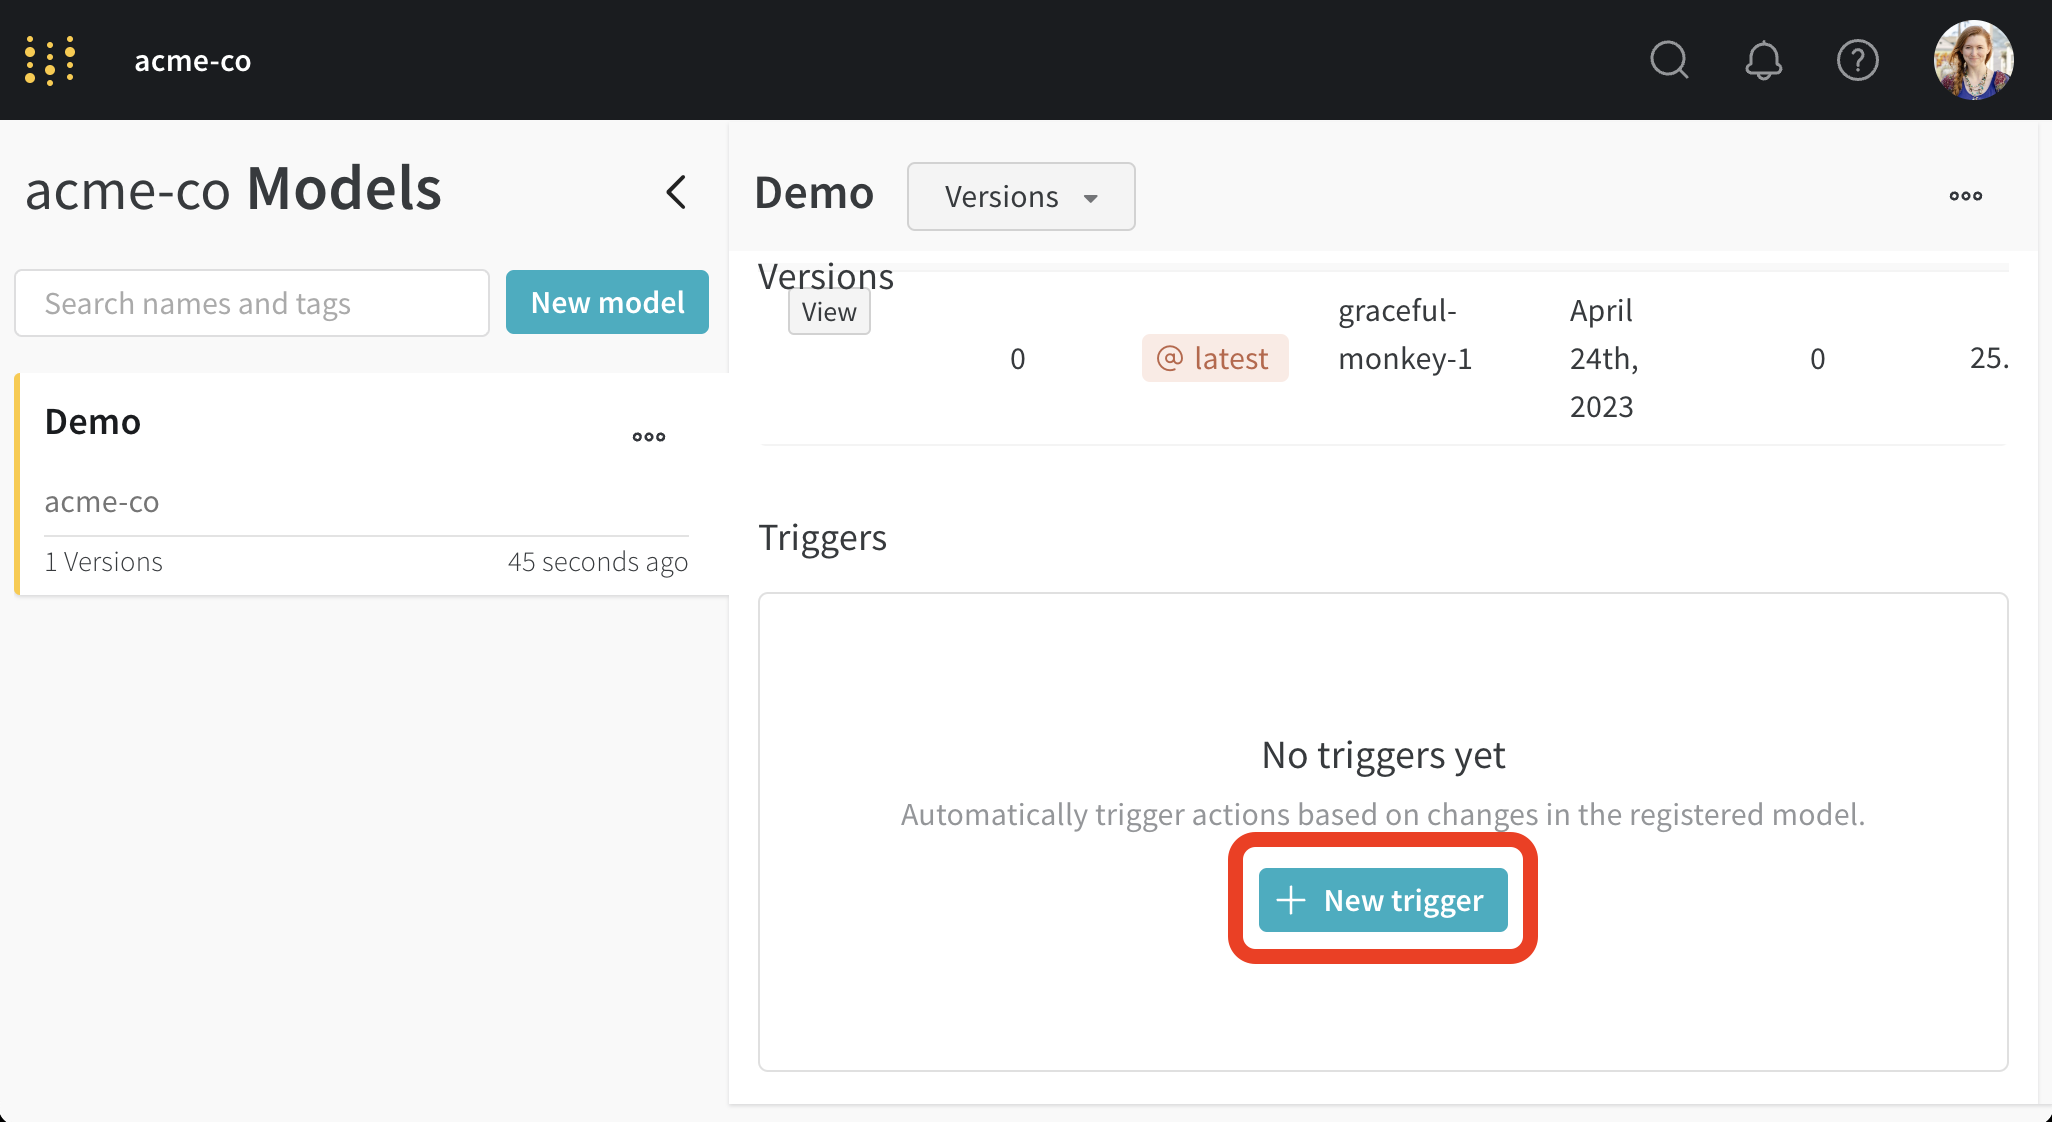

# 4) Create a Launch Queue
1. Go to the Launch application under your Team page
2. Create a queue of type `Docker`, which will automatically manage the containerization of our job when we push it to be executed
3. W&B supports other queue types like `EKS` for when you want to launch jobs into a cluster with auto-scaling capabilities 

# 5) Create an Agent

On your local machine, run `wandb launch agent` to start a new agent process. 

The agent will pull down Jobs from the queue to run, and create runs automatically to log results when you call `wandb` inside the Job.

In [ ]:
# Run in a separate process
!wandb launch-agent -q <my-queue-name> -e <my-entity>

# 6) Run Automation

Finally, run this cell one more time. This will create a new model and link it to the `Demo` Registered Model. 

That will activate the Automation to run the Job on your Agent.

In [ ]:
import wandb
import random

# Start a new W&B run
with wandb.init(project="Automation") as run:

  # Simulate logging model metrics
  run.log({"acc": random.random()})

  # Create a simulated model file
  with open("my_model.h5", "w") as f: f.write("Model: " + str(random.random()))

  # Save the dummy model to W&B
  best_model = wandb.Artifact(f"model_{run.id}", type='model')
  best_model.add_file('my_model.h5')
  run.log_artifact(best_model)

  # Link the model to the Model Registry
  run.link_artifact(best_model, 'model-registry/Demo')